### EX1: Read CSV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(0)
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
    data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
    features_X = data[:, :3]
    sales_Y = data[:, 3]
    features_X = np.c_[np.ones((len(features_X),1)), features_X]
    return features_X, sales_Y

In [2]:
# Q2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [3]:
# Q3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


### EX2: Create individual

In [4]:
def generate_random_value(bound=10):
    return random.uniform(-bound/2, bound/2)

def create_individual(n=4, bound=10):
    individual = [random.uniform(-bound/2, bound/2) for _ in range(n)]
    return individual

individual = create_individual()
print(individual)

[3.4442185152504816, 2.5795440294030243, -0.79428419169155, -2.4108324970703663]


### EX3: Fitness function

In [5]:
features_X, sales_Y = load_data_from_file()

def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    fitness_value = 1/(loss+1)
    return fitness_value

In [6]:
# Q4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


### EX4: Crossover

In [7]:
import secrets

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    n = len(individual1)
    for i in range(0, n):
        if secrets.randbelow(1000) / 1000 < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    
    return individual1_new, individual2_new

In [8]:
# Q5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57,-0.79,-2.41]
individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


### EX5: Mutation

In [9]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(0, len(individual)):
        if secrets.randbelow(1000) / 1000 > mutation_rate:
            individual_m[i] = generate_random_value()
    return individual_m

In [10]:
# Q6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

True


### EX6: Initialize Population

In [11]:
def initialize_population(m):
    population = [create_individual() for _ in range(m)]
    return population

### EX7: Selection

In [12]:
def selection(sorted_old_population, m = 100):
    index1 = secrets.randbelow(m)
    while True:
        index2 = secrets.randbelow(m)
        if (index2 != index1):
            break
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    return individual_s

In [13]:
random.seed(0)

### EX8: Create new population

In [14]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])
    
    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual_s1 = selection(sorted_population, m)
        individual_s2 = selection(sorted_population, m)

        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)

    # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind)
    
    return new_population, compute_loss(sorted_population[m-1])

In [15]:
# Q7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57,-0.79,-2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)

Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


### EX9: All in one - GA

In [16]:
def run_GA():
    n_generations = 200
    m = 600
    features_X, sales_Y = load_data_from_file()
    population = initialize_population(m)
    losses_list = []
    for i in range(n_generations):
        population, loss = create_new_population(population, elitism=2, gen=i)
        losses_list.append(loss)
    return losses_list, population

losses_list, population = run_GA()

Best loss: 499.4287054364574 with chromsome:  [3.331600837968306, -0.09720038244186391, 1.4498755629428342, -0.2732124726990648]
Best loss: 429.2832482753413 with chromsome:  [4.366285882209063, 0.22696541421700278, 0.08734304181597796, -0.4221053717055483]


Best loss: 429.2832482753413 with chromsome:  [4.366285882209063, 0.22696541421700278, 0.08734304181597796, -0.4221053717055483]
Best loss: 10.673720738931948 with chromsome:  [-0.9988270640354742, 0.053652640567075416, 0.2429123237565456, 0.03560402719596922]
Best loss: 10.673720738931948 with chromsome:  [-0.9988270640354742, 0.053652640567075416, 0.2429123237565456, 0.03560402719596922]
Best loss: 10.673720738931948 with chromsome:  [-0.9988270640354742, 0.053652640567075416, 0.2429123237565456, 0.03560402719596922]
Best loss: 10.673720738931948 with chromsome:  [-0.9988270640354742, 0.053652640567075416, 0.2429123237565456, 0.03560402719596922]
Best loss: 10.673720738931948 with chromsome:  [-0.9988270640354742, 0.053652640567075416, 0.2429123237565456, 0.03560402719596922]
Best loss: 10.673720738931948 with chromsome:  [-0.9988270640354742, 0.053652640567075416, 0.2429123237565456, 0.03560402719596922]
Best loss: 10.673720738931948 with chromsome:  [-0.9988270640354742, 0.05365264

Best loss: 172.88016830873053 with chromsome:  [-2.195864711610662, 0.12214819331371807, -0.5096226199107567, 0.09966178261018221]
Best loss: 172.88016830873053 with chromsome:  [-2.195864711610662, 0.12214819331371807, -0.5096226199107567, 0.09966178261018221]
Best loss: 172.88016830873053 with chromsome:  [-2.195864711610662, 0.12214819331371807, -0.5096226199107567, 0.09966178261018221]
Best loss: 172.88016830873053 with chromsome:  [-2.195864711610662, 0.12214819331371807, -0.5096226199107567, 0.09966178261018221]
Best loss: 172.88016830873053 with chromsome:  [-2.195864711610662, 0.12214819331371807, -0.5096226199107567, 0.09966178261018221]
Best loss: 63.222669353943964 with chromsome:  [3.7168166808084138, 0.08745496867753033, 0.2668400480106259, -0.026105614235256702]
Best loss: 63.222669353943964 with chromsome:  [3.7168166808084138, 0.08745496867753033, 0.2668400480106259, -0.026105614235256702]
Best loss: 63.222669353943964 with chromsome:  [3.7168166808084138, 0.08745496867

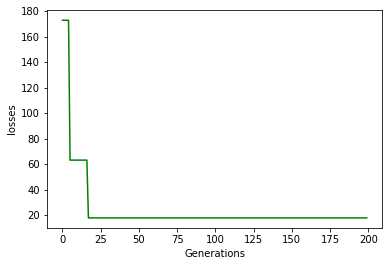

In [17]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
    plt.plot(losses_list, c='green')
    plt.xlabel('Generations')
    plt.ylabel('losses')
    plt.show()

losses_list, population = run_GA()
visualize_loss(losses_list)

[-1.4369018540104017, 0.05197686193219031, 0.2709553197202972, 0.10463439696132948]


C:\Users\Admin\AppData\Local\Temp\ipykernel_7500\4013121926.py:9: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  price = np.sum(t*f for t, f in zip(theta, feature))


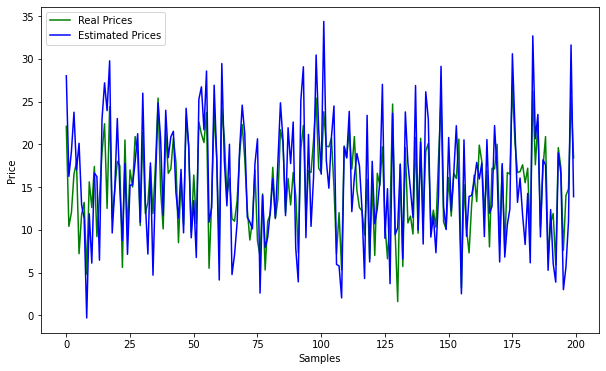

In [18]:
def visualize_predict_gt():
    # visualization of ground truth and predict value
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])

    estimated_prices = []
    for feature in features_X:
        price = np.sum(t*f for t, f in zip(theta, feature))
        estimated_prices.append(price)
        
    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(sales_Y, c='green', label='Real Prices')
    plt.plot(estimated_prices, c='blue', label='Estimated Prices')
    plt.legend()
    plt.show()

visualize_predict_gt()